In [ ]:
#hide
from syntheticDataGen.core import *

# Gaussian Mixture Data Generation For Binary Classification

> This package allows one to generate synethic data for binary classification tasks. Data is sampled from a pair of randomly generated mixtures of multidimensional gaussian distributions. The user can specify the dimensionality, acceptable AUC range of the posterior distibution and component irriducibility parameters.

## Install

`pip install syntheticDataGen`

# Examples

In [ ]:
from syntheticDataGen.dataset import generateParams
import matplotlib.pyplot as plt
import numpy as np

# Gaussian Mixture

In [ ]:
params0 = generateParams(2,1,[.65,.85],)

  0%|                                                                                                                                                     | 0/2 [00:00<?, ?it/s]

isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Sigma Scale Perturb
Sigma Ratios: [0.5 1. ]
Sigma Ratios: [0.5 1. ]
isMetricSatisfied{'aucpn': 0.61508872, 'irreducibility': [0.0252, 0.0]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.61408368, 'irreducibility': [0.0238, 0.0]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.7842663599999999, 'irreducibility': [0.2502, 0.0]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.6039854, 'irreducibility': [0.0222, 0.0]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.60306608, 'irreducibility': [0.0228, 0.0]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.6092671599999999, 'irreducibility': [0.022, 0.0]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.59984048, 'irreducibility': [0.0228, 0.0]}
anchorSetProp0.01
Sigma Scale Perturb
Sigma Ratios: [0.25 1.  ]
0.75
Sigma Ratios: [0.375 1.   ]
0.875
Sigma Ratios: [0.4375 1. 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.61it/s]

Sigma Ratios: [0.49999994 1.        ]
0.9999999403953552
Sigma Ratios: [0.49999997 1.        ]
0.9999999701976776
Sigma Ratios: [0.49999999 1.        ]
0.9999999850988388
Sigma Ratios: [0.49999999 1.        ]
0.9999999925494194
Sigma Ratios: [0.5 1. ]
0.9999999962747097
Sigma Ratios: [0.5 1. ]
0.9999999981373549
Sigma Ratios: [0.5 1. ]
0.9999999990686774
Sigma Ratios: [0.5 1. ]
0.9999999995343387
Sigma Ratios: [0.5 1. ]
0.9999999997671694
Sigma Ratios: [0.5 1. ]
0.9999999998835847
Sigma Ratios: [0.5 1. ]
0.9999999999417923
Sigma Ratios: [0.5 1. ]
0.9999999999708962
Sigma Ratios: [0.5 1. ]
0.9999999999854481
Sigma Ratios: [0.5 1. ]
0.999999999992724
Sigma Ratios: [0.5 1. ]
0.999999999996362
Sigma Ratios: [0.5 1. ]
0.999999999998181
Sigma Ratios: [0.5 1. ]
0.9999999999990905
Sigma Ratios: [0.5 1. ]
0.9999999999995453
Sigma Ratios: [0.5 1. ]
0.9999999999997726
Sigma Ratios: [0.5 1. ]
0.9999999999998863
Sigma Ratios: [0.5 1. ]
0.9999999999999432
Sigma Ratios: [0.5 1. ]
0.9999999999999716
S

0 1 2.2547747161844143


In [ ]:
X,y,componentAssignment,XPos,XNeg,componentAssignmentPos,componentAssignmentNeg = params0.dg.pn_data(100000)

Text(0.5, 1.0, 'posterior distribution')

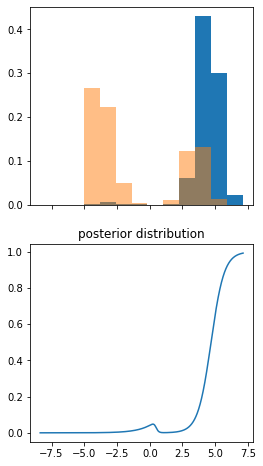

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(4,8),sharex=True)
binvalsPos, bins, patches = ax[0].hist(X[y.ravel()].ravel(),density=True)
binvalsNeg,_,_ = ax[0].hist(X[~y.ravel()].ravel(),density=True,alpha=.5,bins=bins)
rng = np.arange(X.min(),X.max(),.01)
ax[1].plot(rng,params0.dg.pn_posterior(rng))
ax[1].set_title("posterior distribution")
# ax[1].scatter((bins[:-1]+bins[1:])/2,binvalsPos/(binvalsPos+binvalsNeg))

In [ ]:
from sklearn import metrics

Overall distribution might not have posterior in the given range; here all the 

In [ ]:
metrics.roc_auc_score(y,params0.dg.pn_posterior(X))

0.9463780887594025

The posterior distribution will result in an AUC in the specified range when evaluated on each component

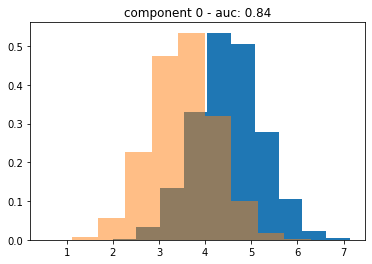

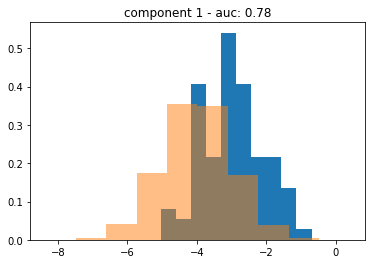

In [ ]:
for k in np.unique(componentAssignment).astype(int):
    Xk,yk = X[componentAssignment==k],y[componentAssignment==k]
    plt.hist(Xk[yk],density=True)
    plt.hist(Xk[~yk],alpha=.5,density=True)
    plt.title(f"component {k} - auc: {metrics.roc_auc_score(yk,params0.dg.pn_posterior(Xk)):.2f}")
    plt.show()

## Multivariate Gaussian Example

Generate a dataset comprised of 3 clusters in 2 dimensions each with an AUC in the range $[.6, .8]$

In [ ]:
params1 = generateParams(3,2,[.6,.8],)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 20.50it/s]


isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.7584392399999998, 'irreducibility': [0.0458, 0.0456]}
anchorSetProp0.01
isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Mu Perturb
isMetricSatisfied{'aucpn': 0.75774036, 'irreducibility': [0.0418, 0.0458]}
anchorSetProp0.01
isMetricSatisfied{'aucpn': 0.5, 'irreducibility': [0.0, 0.0]}
anchorSetProp0.01
Sigma Shape Perturb
Sigma Ratios: [1.         0.39568147]
Sigma Ratios: [1.         0.94503512]
Sigma Ratios: [1.         0.94503512]
isMetricSatisfied{'aucpn': 0.62142496, 'irreducibility': [0.0046, 0.009]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.61857888, 'irreducibility': [0.0062, 0.009]}
anchorSetProp0.01
Perturb Proportion
isMetricSatisfied{'aucpn': 0.6108399200000001, 'irreducibility': [0.005, 0.0098]}
anchorS

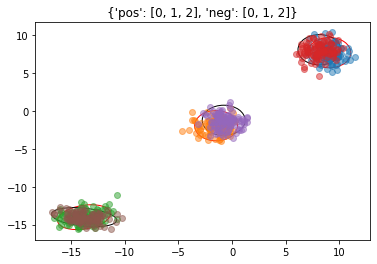

In [ ]:
params1.plotCIEllipse()

In [ ]:
results2D = params1.dg.pn_data(5000)

In [ ]:
[r.shape for r in results2D]

[(5000, 2), (5000, 1), (5000, 1), (2353, 2), (2647, 2), (2353, 1), (2647, 1)]

positive class conditional distribution weights

In [ ]:
params1.dg.dist_p.mixProp

array([0.40830413, 0.14546069, 0.44623518])

negative class conditional distribution weights

In [ ]:
params1.dg.dist_n.mixProp

array([0.27782571, 0.05971392, 0.66246037])

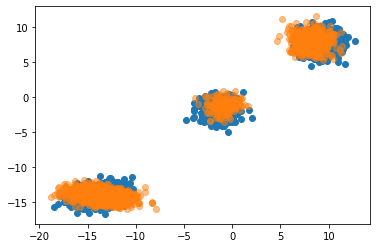

In [ ]:
plt.scatter(*results2D[0][results2D[1].ravel()].T)
plt.scatter(*results2D[0][~results2D[1].ravel()].T,alpha=.5)